In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pathlib import Path

In [2]:
# Load in average readmissions data and read
average_readmission_clean_csv = Path("Output/Average_Readmission_Clean.csv")
average_readmission_clean = pd.read_csv(average_readmission_clean_csv)
average_readmission_clean

,state,Race,% Readmission
0,ALABAMA,American Indian/Alaska native,15.767442
1,ALABAMA,Asian/Pacific islander,15.480000
2,ALABAMA,Black,15.403689
3,ALABAMA,Hispanic,15.300654
4,ALABAMA,Other,15.555556
...,...,...,...
303,WYOMING,Asian/Pacific islander,15.181818
304,WYOMING,Black,15.000000
305,WYOMING,Hispanic,14.988764
306,WYOMING,Other,15.062500


In [3]:
# Convert to dataframe
average_readmission_clean_df = pd.DataFrame(average_readmission_clean)
# Find average readmission rate per state --- so we can find worst 4 states and best 4 states (% Readmission)
avg_readmissions_by_state = average_readmission_clean_df.groupby('state')['% Readmission'].mean()
avg_read_state_df = pd.DataFrame(avg_readmissions_by_state)
avg_read_state_df.head(10)

,% Readmission
state,
ALABAMA,15.478021
ALASKA,14.172724
ARIZONA,15.015916
ARKANSAS,15.829309
CALIFORNIA,15.387323
COLORADO,14.612978
CONNECTICUT,16.042437
DELAWARE,15.629630
DISTRICT OF COLUMBIA,16.743056


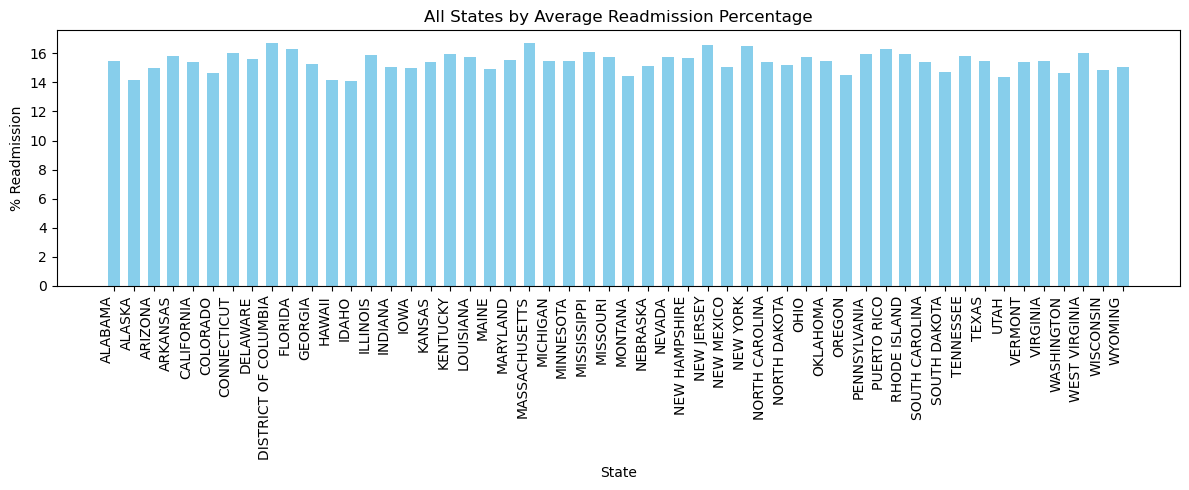

In [4]:
plt.figure(figsize=(12, 5))
plt.bar(avg_read_state_df.index, avg_read_state_df['% Readmission'], color='skyblue', width=0.6)
plt.xlabel('State')
plt.ylabel('% Readmission')
plt.title('All States by Average Readmission Percentage')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [5]:
# Get worst 4 states by % Readmission
worst_sorted_states = avg_readmissions_by_state.sort_values(ascending=False)
# Get the worst 4 states
worst_4_states = worst_sorted_states.head(4)
worst_4_states_df = pd.DataFrame(worst_4_states)
worst_4_states_df

,% Readmission
state,
DISTRICT OF COLUMBIA,16.743056
MASSACHUSETTS,16.706773
NEW JERSEY,16.568565
NEW YORK,16.498212


In [6]:
# Get best 4 states by % Readmission
best_sorted_states = avg_readmissions_by_state.sort_values(ascending=True)
# Get the best 4 states
best_4_states = best_sorted_states.head(4)
best_4_states_df = pd.DataFrame(best_4_states)
best_4_states_df

,% Readmission
state,
IDAHO,14.127872
HAWAII,14.171429
ALASKA,14.172724
UTAH,14.367306


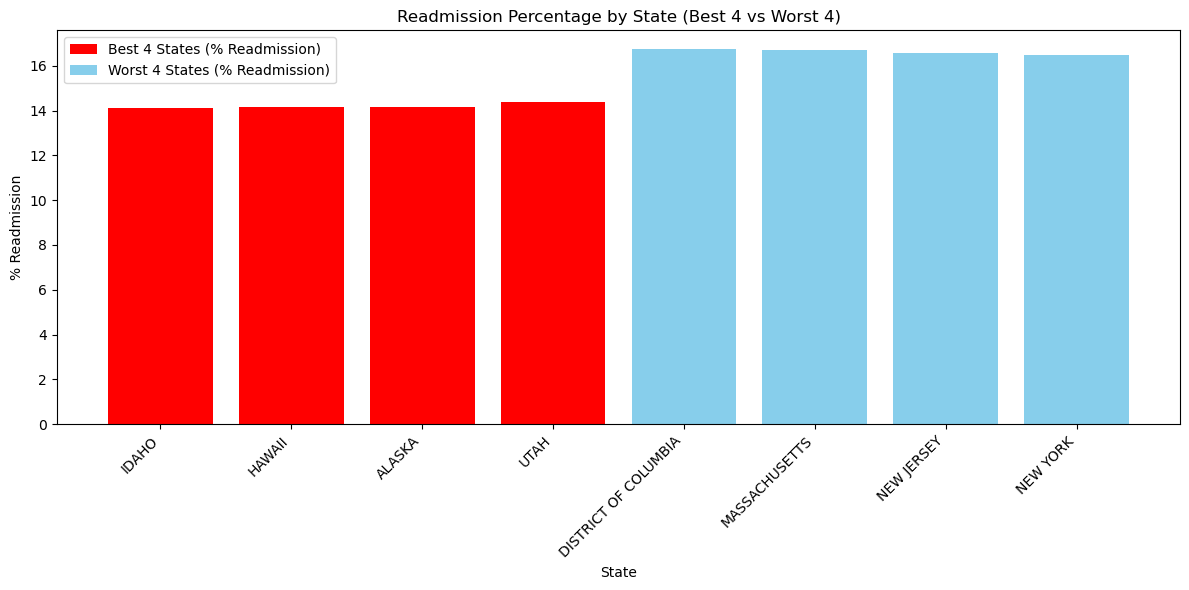

In [7]:
plt.figure(figsize=(12, 6))

# Plot best 4 states data with green bars
plt.bar(best_4_states_df.index, best_4_states_df['% Readmission'], color='red', width=0.8, label='Best 4 States (% Readmission)')

# Plot worst 4 states with blue bars
plt.bar(worst_4_states_df.index, worst_4_states_df['% Readmission'], color='skyblue', width=0.8, label='Worst 4 States (% Readmission)')

# Adding labels and title
plt.xlabel('State')
plt.ylabel('% Readmission')
plt.title('Readmission Percentage by State (Best 4 vs Worst 4)')
plt.xticks(rotation=45, ha='right')
plt.legend()  # Show legend with labels for each set of bars
plt.tight_layout()
plt.show()

In [8]:
best_4_states = ['IDAHO', 'HAWAII', 'ALASKA', 'UTAH']

filtered_df1 = average_readmission_clean_df[average_readmission_clean_df['state'].str.upper().isin(best_4_states)]
filtered_df1

,state,Race,% Readmission
6,ALASKA,American Indian/Alaska native,15.000000
7,ALASKA,Asian/Pacific islander,14.173913
8,ALASKA,Black,14.000000
9,ALASKA,Hispanic,13.925926
10,ALASKA,Other,13.333333
11,ALASKA,White,14.603175
66,HAWAII,American Indian/Alaska native,13.600000
67,HAWAII,Asian/Pacific islander,14.277778
68,HAWAII,Black,14.095238
69,HAWAII,Hispanic,14.333333


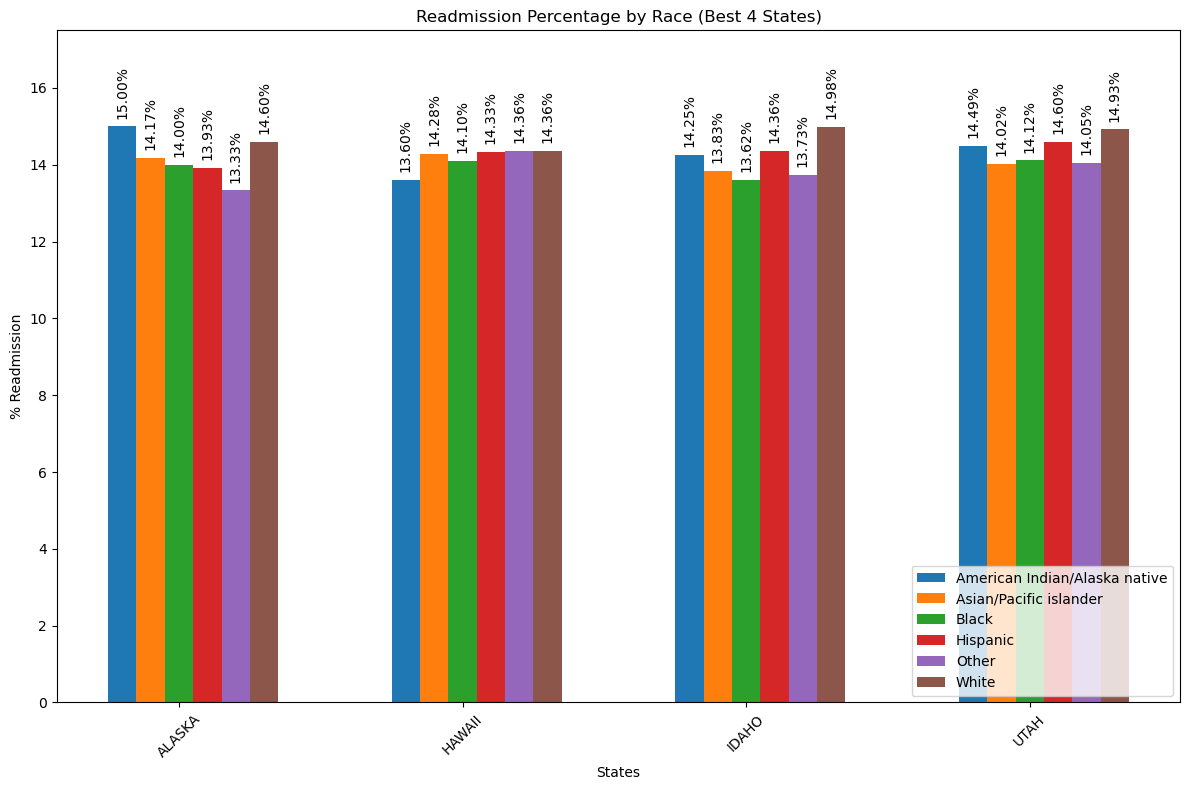

In [9]:
states = filtered_df1['state'].unique()
races = filtered_df1['Race'].unique()

# Group the dataframe by state and race
grouped_df = filtered_df1.groupby(['state', 'Race']).mean().reset_index()

# Create the chart
plt.figure(figsize=(12, 8))
bar_width = 0.1
index = range(len(states))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Plot each race for each state
for i, race in enumerate(races):
    race_data = grouped_df[grouped_df['Race'] == race]
    plt.bar([p + i * bar_width for p in index], race_data['% Readmission'], bar_width, label=race, color=colors[i])
    # Add labels on top each bar
    for j, percentage in enumerate(race_data['% Readmission']):
        plt.text(index[j] + i * bar_width, percentage + 0.2, f'{percentage:.2f}%', ha='center', va='bottom', rotation=90)

plt.xlabel('States')
plt.ylabel('% Readmission')
plt.title('Readmission Percentage by Race (Best 4 States)')
plt.xticks([p + bar_width * len(states) / 2 for p in index], states)
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.ylim(0, 17.5)
plt.tight_layout()
plt.show()

In [10]:
worst_4_states = ['DISTRICT OF COLUMBIA', 'MASSACHUSETTS', 'NEW JERSEY', 'NEW YORK']

filtered_df2 = average_readmission_clean_df[average_readmission_clean_df['state'].str.upper().isin(worst_4_states)]
filtered_df2

,state,Race,% Readmission
48,DISTRICT OF COLUMBIA,American Indian/Alaska native,17.125000
49,DISTRICT OF COLUMBIA,Asian/Pacific islander,16.777778
50,DISTRICT OF COLUMBIA,Black,16.777778
51,DISTRICT OF COLUMBIA,Hispanic,16.777778
52,DISTRICT OF COLUMBIA,Other,16.555556
53,DISTRICT OF COLUMBIA,White,16.444444
126,MASSACHUSETTS,American Indian/Alaska native,16.860000
127,MASSACHUSETTS,Asian/Pacific islander,16.765306
128,MASSACHUSETTS,Black,16.628319
129,MASSACHUSETTS,Hispanic,16.697248


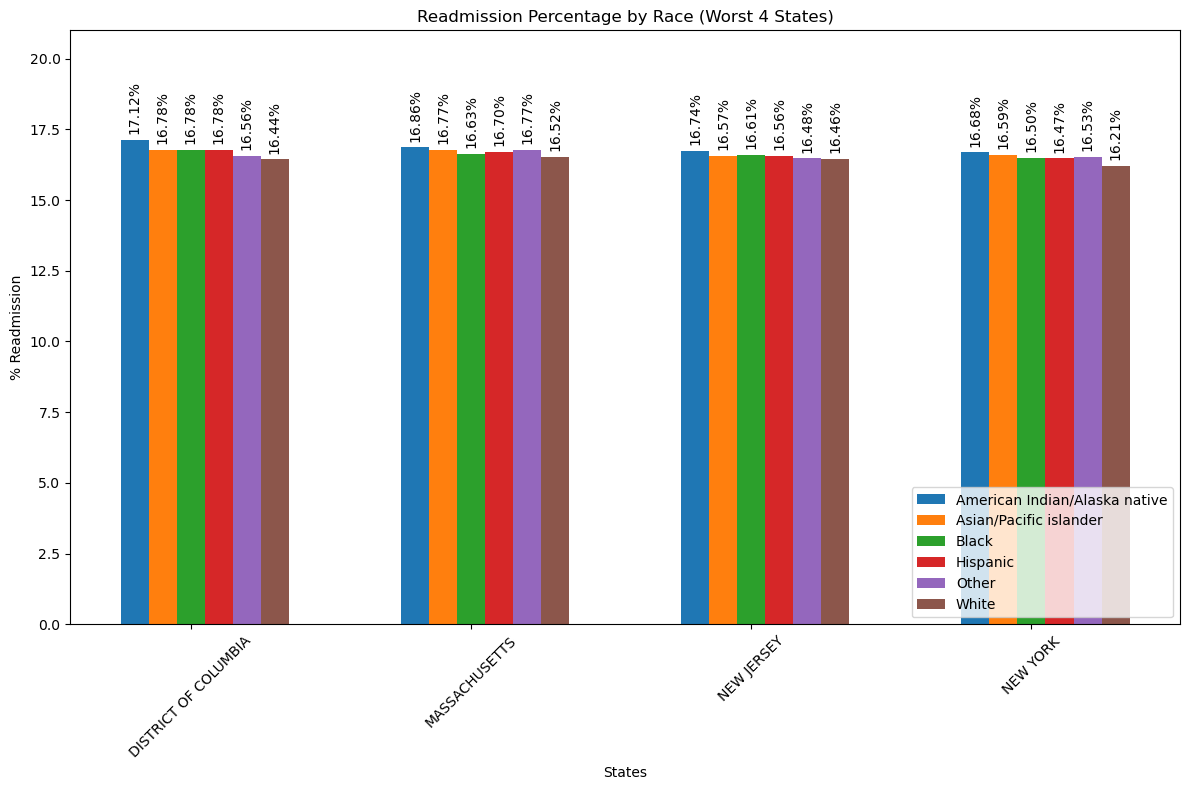

In [11]:
states = filtered_df2['state'].unique()
races = filtered_df2['Race'].unique()

# Group the dataframe by state and race
grouped_df = filtered_df2.groupby(['state', 'Race']).mean().reset_index()

# Create bar chart
plt.figure(figsize=(12, 8))
bar_width = 0.1
index = range(len(states))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Plot each race for each state
for i, race in enumerate(races):
    race_data = grouped_df[grouped_df['Race'] == race]
    plt.bar([p + i * bar_width for p in index], race_data['% Readmission'], bar_width, label=race, color=colors[i])
    # Add labels on top each bar
    for j, percentage in enumerate(race_data['% Readmission']):
        plt.text(index[j] + i * bar_width, percentage + 0.2, f'{percentage:.2f}%', ha='center', va='bottom', rotation=90)

plt.xlabel('States')
plt.ylabel('% Readmission')
plt.title('Readmission Percentage by Race (Worst 4 States)')
plt.xticks([p + bar_width * len(states) / 2 for p in index], states)
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.ylim(0, 21)
plt.tight_layout()
plt.show()

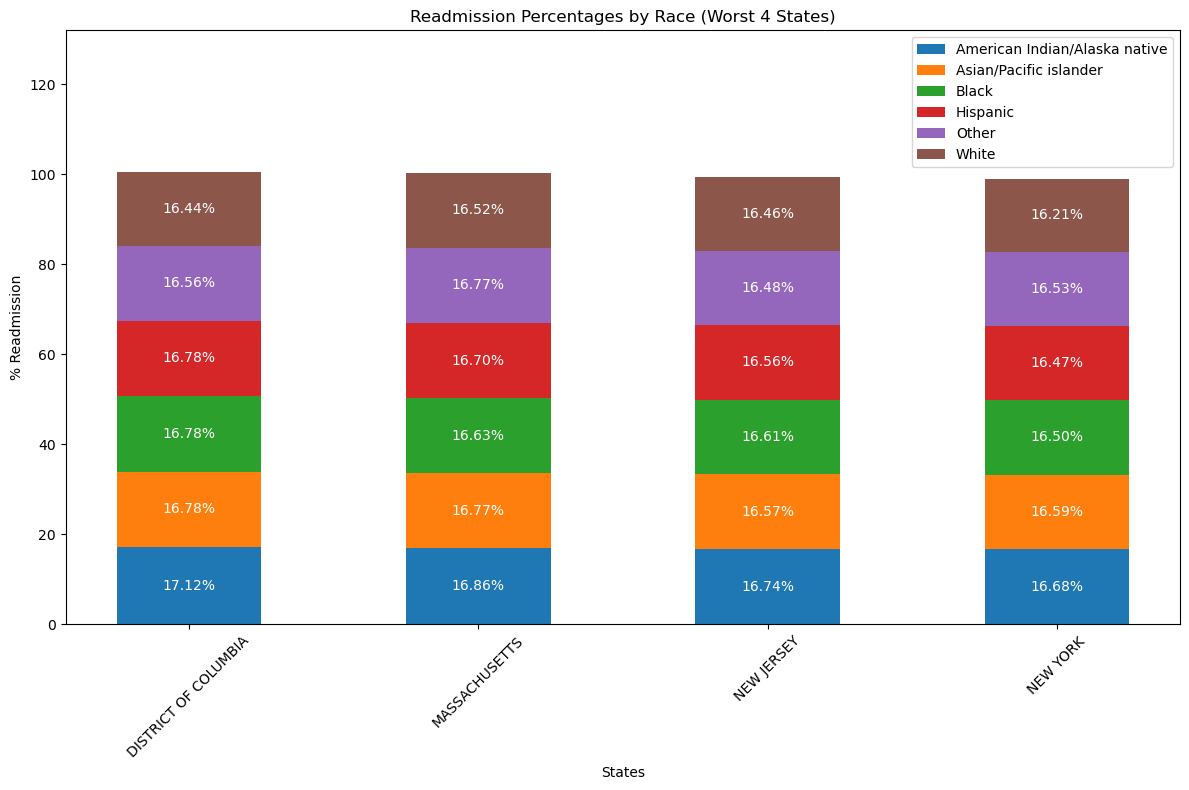

In [12]:
states = filtered_df2['state'].unique()
races = filtered_df2['Race'].unique()

# Group dataframe by state and race
grouped_df = filtered_df2.groupby(['state', 'Race']).mean().reset_index()

#create chart
plt.figure(figsize=(12, 8))

bar_width = 0.5
index = range(len(states))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
bottom = [0] * len(states)

# Plot each race for each state
for i, race in enumerate(races):
    race_data = grouped_df[grouped_df['Race'] == race]
    race_percentages = race_data['% Readmission']
    plt.bar(index, race_percentages, bar_width, label=race, color=colors[i], bottom=bottom)
    # Add labels within bars
    for j, percentage in enumerate(race_percentages):
        plt.text(index[j], bottom[j] + percentage / 2, f'{percentage:.2f}%', ha='center', va='center', color='white')
    bottom = [bottom[j] + percentage for j, percentage in enumerate(race_percentages)]

plt.xlabel('States')
plt.ylabel('% Readmission')
plt.title('Readmission Percentages by Race (Worst 4 States)')
plt.xticks(index, states)
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.ylim(0, 132) 
plt.tight_layout()
plt.show()

In [13]:
# Load in census data and read
state_census_clean_csv = Path("Output/Seleceted_States.csv")
state_census_clean = pd.read_csv(state_census_clean_csv)
# state_census_clean

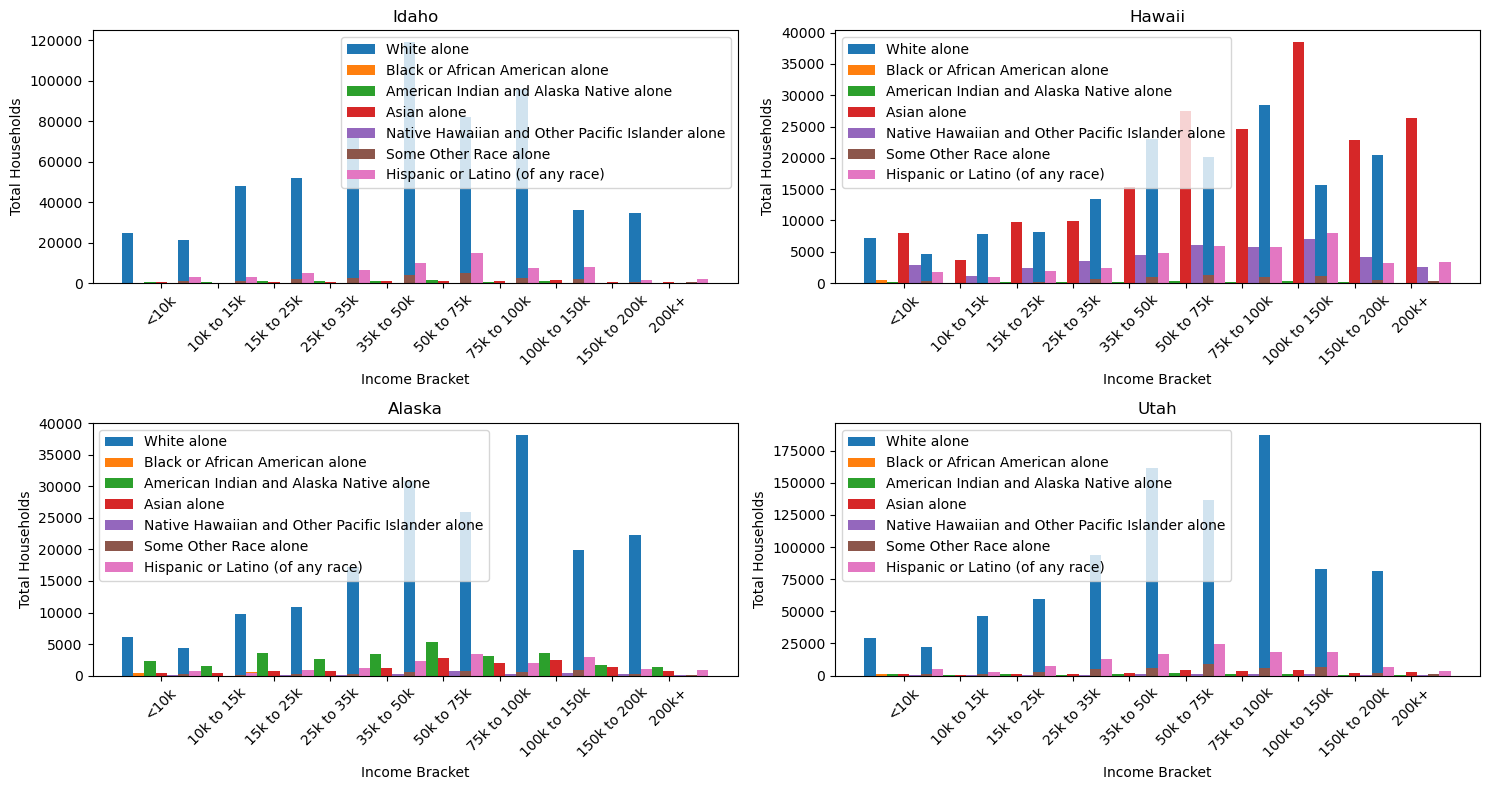

In [14]:
# Choose specific states to plot
states_to_plot = ["Idaho", "Hawaii", "Alaska", "Utah"]

# Filter data for the chosen states
state_data = state_census_clean[state_census_clean['State'].isin(states_to_plot)]

# Get unique income brackets
income_brackets = state_census_clean.columns[3:]

# Create a dictionary to store data for each state
state_data_dict = {}
for state in states_to_plot:
    state_data_dict[state] = state_data[state_data['State'] == state].set_index('Race')[income_brackets].T.to_dict()

# Plot multi-bar graphs for each state
num_states = len(states_to_plot)
num_rows = 2
num_cols = (num_states + 1) // num_rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

for i, state in enumerate(states_to_plot):
    ax = axes[i // num_cols, i % num_cols]
    races = list(state_data_dict[state].keys())
    num_races = len(races)
    bar_width = 0.2
    index = np.arange(len(income_brackets))
    
    for j, race in enumerate(races):
        bar_positions = index + j * bar_width - (bar_width * (num_races - 1) / 2)
        race_data = list(state_data_dict[state][race].values())
        ax.bar(bar_positions, race_data, bar_width, label=race)
    
    ax.set_title(state)
    ax.set_xlabel("Income Bracket")
    ax.set_ylabel("Total Households")
    ax.set_xticks(index)
    ax.set_xticklabels(income_brackets, rotation=45)
    ax.legend()

# Adjust layout

plt.tight_layout()
plt.show()

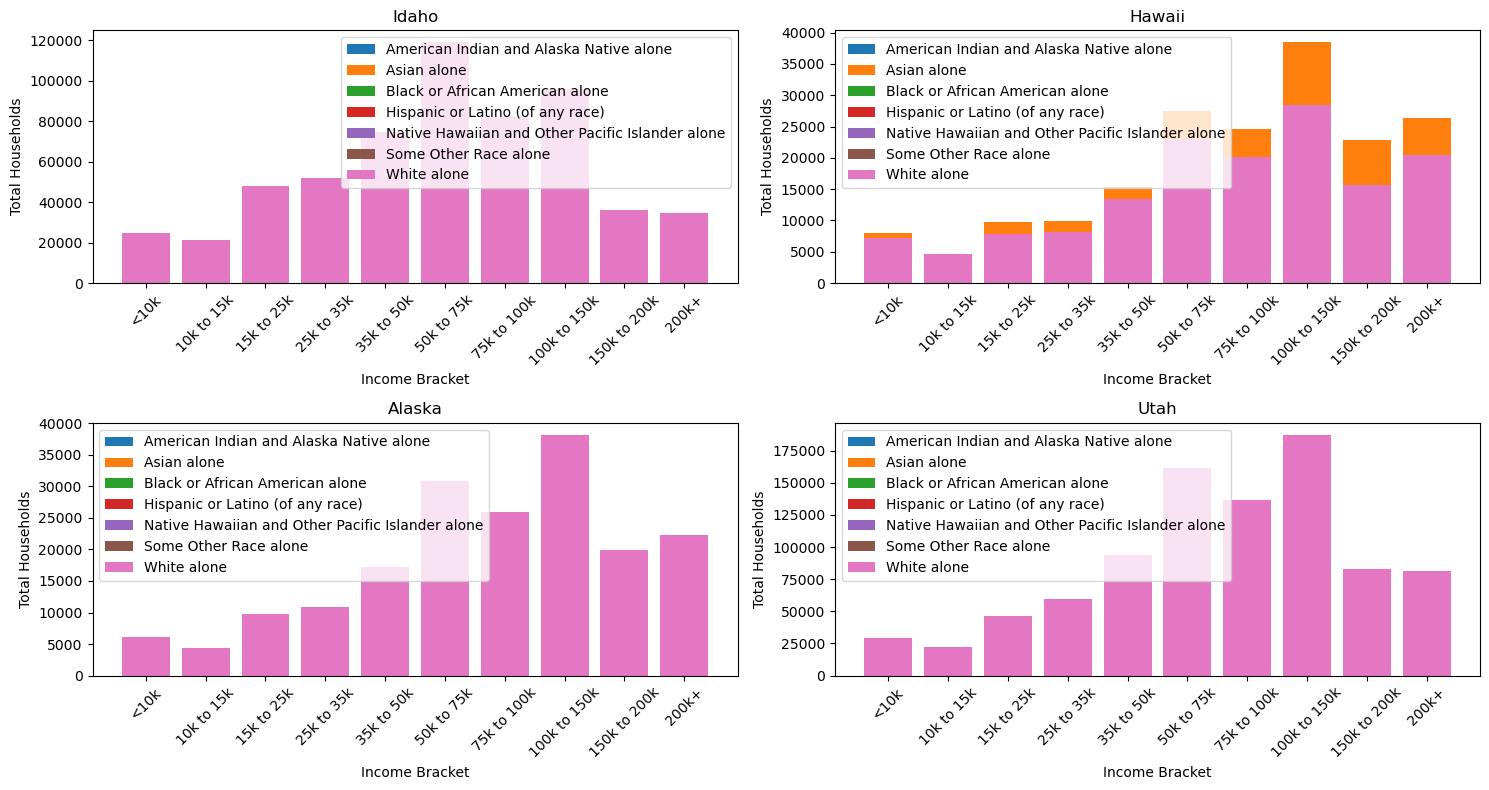

In [15]:
# Choose specific states to plot
states_to_plot = ["Idaho", "Hawaii", "Alaska", "Utah"]

# Filter data for the chosen states
state_data = state_census_clean[state_census_clean['State'].isin(states_to_plot)]

# Group data by state and race
top_readmission_data = state_data.groupby(['State', 'Race'])

# Get unique income brackets
income_brackets = state_census_clean.columns[3:]

# Plot bar charts for the chosen states
num_states = len(states_to_plot)
num_rows = 2
num_cols = (num_states + 1) // num_rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

for (state, race), top_readmission_df in top_readmission_data:
    index = states_to_plot.index(state)
    ax = axes[index // num_cols, index % num_cols]
    
    # Calculate total households for each income bracket
    total_households = top_readmission_df[income_brackets].sum()
    
    # Plot bar chart
    ax.bar(income_brackets, total_households, label=race)
    ax.set_title(f"{state}")
    ax.set_xlabel("Income Bracket")
    ax.set_ylabel("Total Households")
    ax.tick_params(axis='x', rotation=45)
    ax.legend()

# Adjust layout

plt.tight_layout()
plt.show()

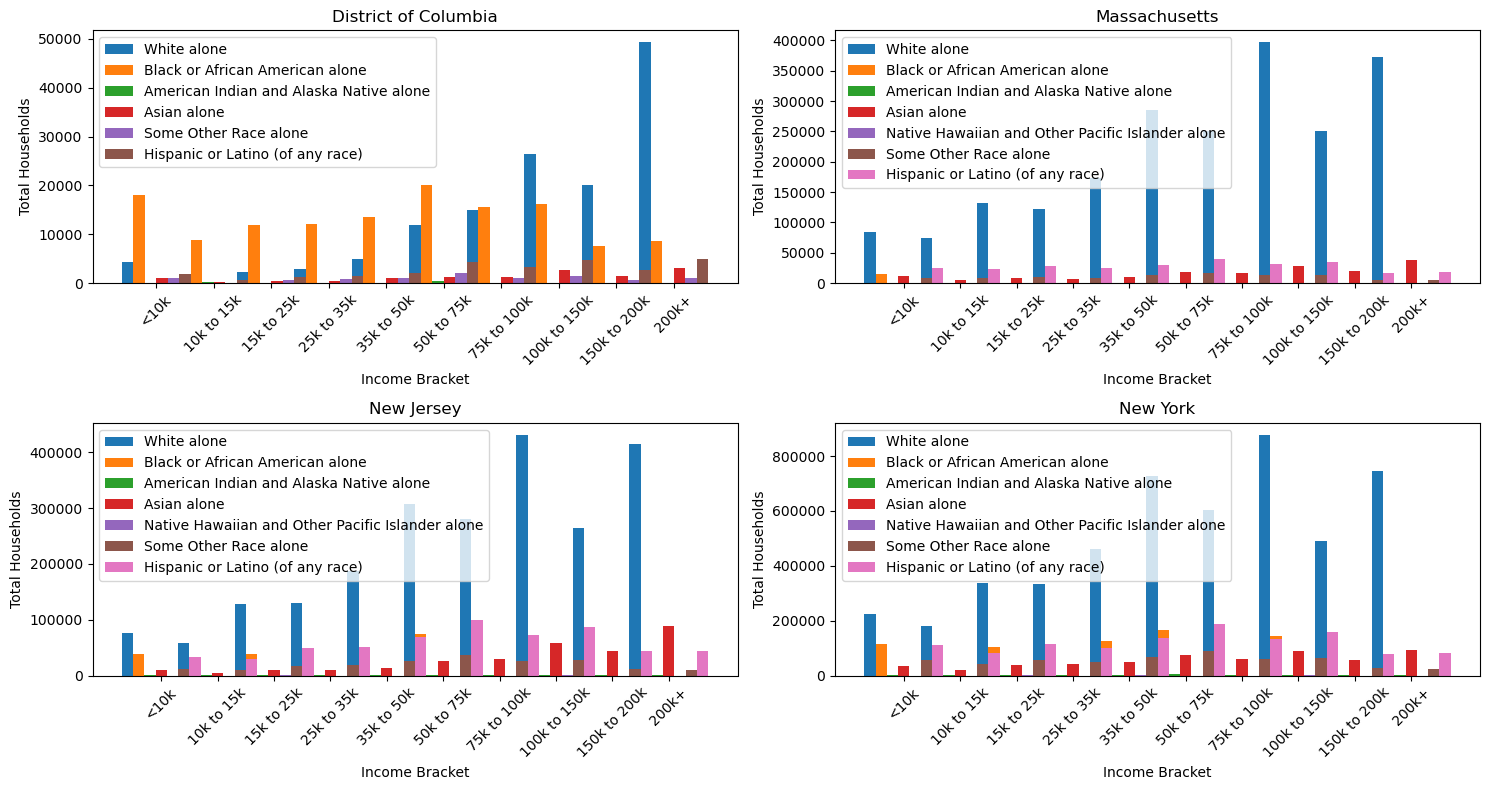

In [16]:
# Choose specific states to plot
states_to_plot = ["District of Columbia", "Massachusetts", "New Jersey", "New York"]

# Filter data for the chosen states
state_data = state_census_clean[state_census_clean['State'].isin(states_to_plot)]

# Get unique income brackets
income_brackets = state_census_clean.columns[3:]

# Create a dictionary to store data for each state
state_data_dict = {}
for state in states_to_plot:
    state_data_dict[state] = state_data[state_data['State'] == state].set_index('Race')[income_brackets].T.to_dict()

# Plot multi-bar graphs for each state
num_states = len(states_to_plot)
num_rows = 2
num_cols = (num_states + 1) // num_rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

for i, state in enumerate(states_to_plot):
    ax = axes[i // num_cols, i % num_cols]
    races = list(state_data_dict[state].keys())
    num_races = len(races)
    bar_width = 0.2
    index = np.arange(len(income_brackets))
    
    for j, race in enumerate(races):
        bar_positions = index + j * bar_width - (bar_width * (num_races - 1) / 2)
        race_data = list(state_data_dict[state][race].values())
        ax.bar(bar_positions, race_data, bar_width, label=race)
    
    ax.set_title(state)
    ax.set_xlabel("Income Bracket")
    ax.set_ylabel("Total Households")
    ax.set_xticks(index)
    ax.set_xticklabels(income_brackets, rotation=45)
    ax.legend()

# Adjust layout

plt.tight_layout()
plt.show()

In [17]:
state_data.describe()

,Total Household,<10k,10k to 15k,15k to 25k,25k to 35k,35k to 50k,50k to 75k,75k to 100k,100k to 150k,150k to 200k,200k+
count,2.700000e+01,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,5.687361e+05,32817.962963,24562.000000,40968.259259,39470.222222,53992.148148,82515.222222,67141.703704,94730.148148,54098.333333,78440.148148
std,1.071457e+06,51284.615033,40062.048488,72315.346822,70528.326796,97821.345389,154434.632299,129126.260719,191033.055568,110491.963104,168368.622706
min,8.170000e+02,60.000000,17.000000,20.000000,43.000000,56.000000,52.000000,25.000000,47.000000,15.000000,59.000000
25%,1.151300e+04,1034.000000,492.500000,700.000000,721.500000,1015.000000,1699.000000,1201.500000,1996.000000,1097.000000,1232.000000
50%,1.625720e+05,11798.000000,8850.000000,9457.000000,9707.000000,13561.000000,20097.000000,16835.000000,26509.000000,12704.000000,11687.000000
75%,5.472665e+05,36114.000000,28225.000000,44405.000000,45117.000000,58722.500000,82282.500000,61191.000000,76459.000000,43882.000000,59027.500000
max,4.977721e+06,224410.000000,179107.000000,336747.000000,333261.000000,459621.000000,727979.000000,601749.000000,877368.000000,491711.000000,745768.000000
